# Turnover Prediction

### purpose : Define a model to predict the turnover in the company from the data issued by the human ressource

Form analysis : 
- target varaible: quit
- lignes et colonnes : 14999, 21
- types : 
 - int64:6 
 - object:2
 - float64:2
- missing value : 0%


Import Libraries
---

In [309]:
%matplotlib inline
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas as pd
import pandas_profiling
plt.style.use("ggplot")
warnings.simplefilter("ignore")
import seaborn as sns

In [310]:
plt.rcParams['figure.figsize'] = (12,8)

### Exploratory Data Analysis
---

In [311]:
hr=pd.read_csv('/Users/robin/Desktop/turnover_project/employee_data.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [312]:
hr.shape

(14999, 10)

In [313]:
hr.dtypes.value_counts()

int64      6
object     2
float64    2
dtype: int64

In [364]:
hr.isna().sum()

satisfaction_level        0
last_evaluation           0
number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
quit                      0
promotion_last_5years     0
department_IT             0
department_RandD          0
department_accounting     0
department_hr             0
department_management     0
department_marketing      0
department_product_mng    0
department_sales          0
department_support        0
department_technical      0
salary_high               0
salary_low                0
salary_medium             0
dtype: int64

In [314]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


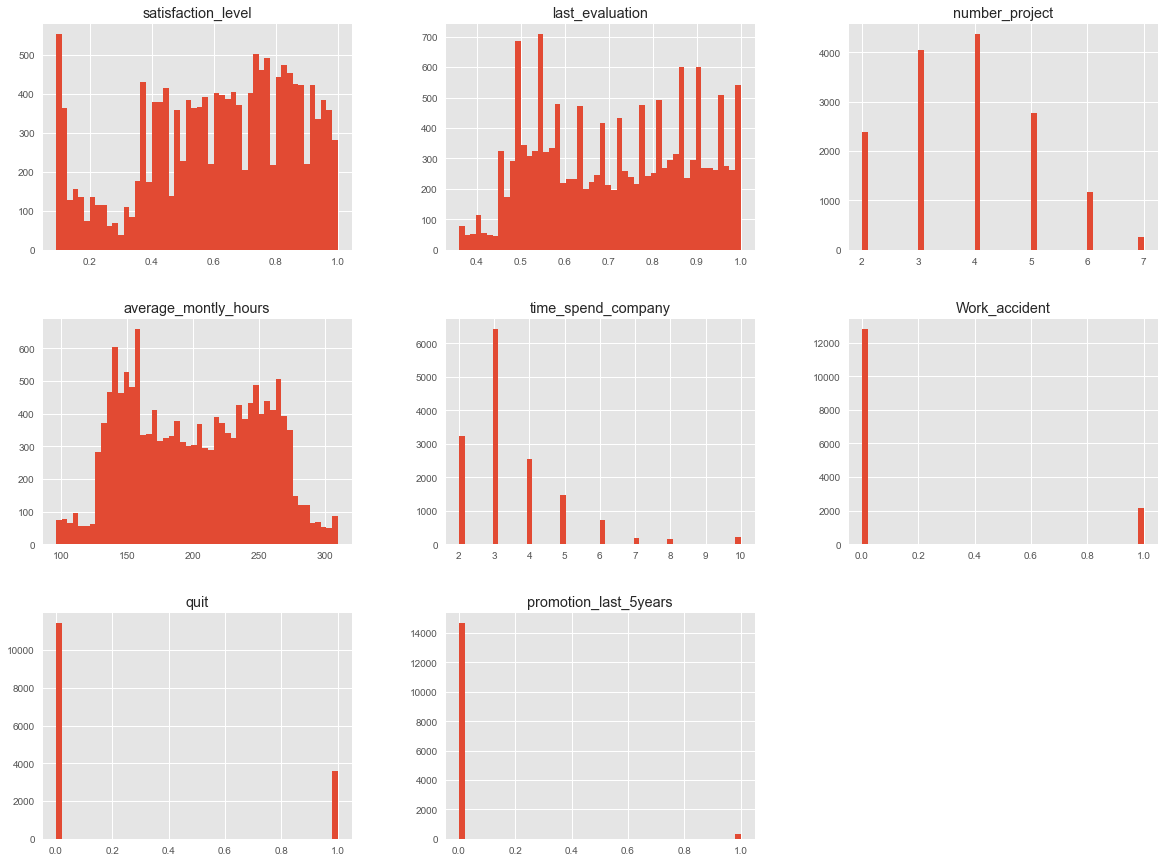

In [315]:
%matplotlib inline
import matplotlib.pyplot as plt
hr.hist(bins=50, figsize=(20,15))
plt.show()

In [316]:
list_forbox=['satisfaction_level','last_evaluation', 'number_project','average_montly_hours']

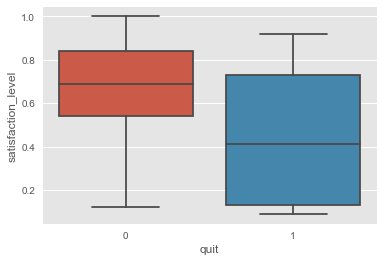

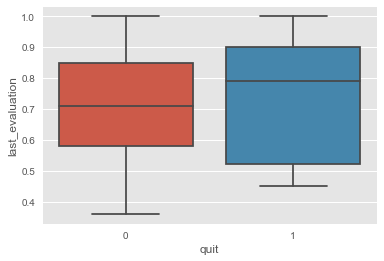

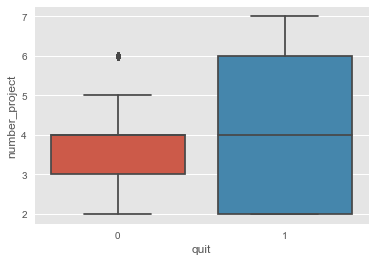

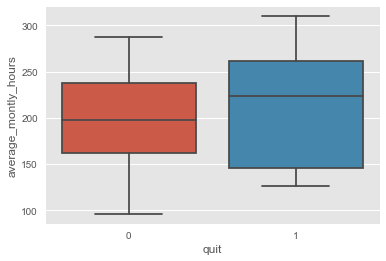

In [317]:
for col in list_forbox:
    plt.figure()
    ax = sns.boxplot(x="quit", y=col, data=hr)

As we can expect people with a low-lewel of satisfaction quit more we observe the same situation for people with a lot of project and the ones who worked the most monthly.
For the variable last_evaluation it will important to contact the provider to get more information because it's hard interpret this indicator.

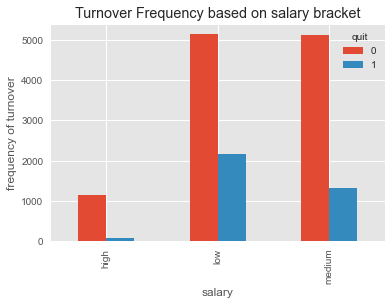

In [318]:
pd.crosstab(hr.salary, hr.quit).plot(kind='bar')
plt.title('Turnover Frequency based on salary bracket')
plt.xlabel('salary')
plt.ylabel('frequency of turnover')
plt.show()

We can see that the salary seems to impact our target and people with a low salary quit in proportion than the Medium and high salary

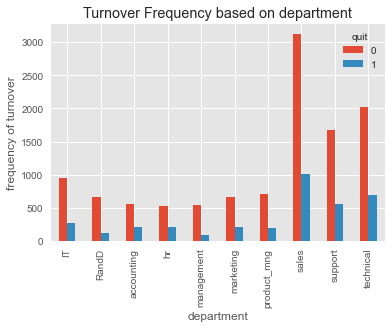

In [319]:
pd.crosstab(hr.department, hr.quit).plot(kind='bar')
plt.title('Turnover Frequency based on department')
plt.xlabel('department')
plt.ylabel('frequency of turnover')
plt.show()

The proportions of people who quited are higher in some deparment like sales, support and technical 

### Encode Categorical Features
---

In [320]:
cat_vars=['department','salary']
for var in cat_vars:
    cat_list=pd.get_dummies(hr[var], prefix=var)
    hr=hr.join(cat_list)

In [321]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0


In [322]:
hr.drop(columns=['department','salary'], axis=1, inplace=True)

### Visualize Class Imbalance
---

In [323]:
from yellowbrick.target import ClassBalance
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12,8)

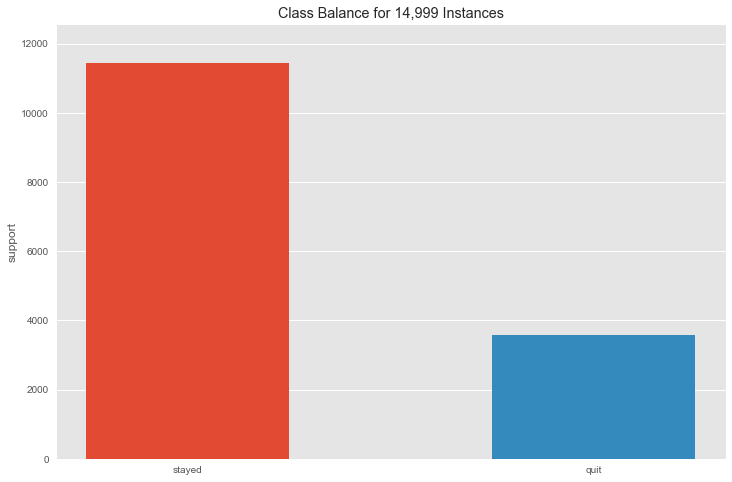

<AxesSubplot:title={'center':'Class Balance for 14,999 Instances'}, ylabel='support'>

In [324]:
visualizer=ClassBalance(labels=['stayed','quit']).fit(hr.quit)
visualizer.show()

### Create Training and Test Sets
---

In [325]:
X=hr.loc[:,hr.columns!='quit']
y=hr.quit

In [326]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, random_state=0,test_size=0.2, stratify=y)

## Regression classifier

In [327]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier()
sgd_clf.fit(X_train, y_train)

SGDClassifier()

In [328]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(sgd_clf, X_train,y_train, cv=3)

In [329]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[6983, 2159],
       [1326, 1531]])

In [330]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred)

0.4149051490514905

In [331]:
recall_score(y_train,y_train_pred)

0.535876793839692

In [332]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred)

0.46769512753933096

In [333]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz # display the tree within a Jupyter notebook
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from ipywidgets import interactive, IntSlider, FloatSlider, interact
import ipywidgets
from IPython.display import Image
from subprocess import call
import matplotlib.image as mpimg

### Random Forest Classifier
---

Although randomization increases bias, it is possible to get a reduction in variance of the ensemble. Random forests are one of the most robust machine learning algorithms for a variety of problems.

- Randomization and averaging lead to a reduction in variance and improve accuracy
- The implementations are parallelizable
- Memory consumption and training time can be reduced by bootstrapping
- Sampling features and not solely sampling examples is crucial to improving accuracy

In [334]:
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'

### Feature Importance and Evaluation Metrics
---

In [335]:
from yellowbrick.model_selection import FeatureImportances
plt.rcParams['figure.figsize'] = (12,8)
plt.style.use("ggplot")

In [336]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [337]:
from sklearn.ensemble import RandomForestClassifier
forest_clf=RandomForestClassifier(random_state=0)

In [338]:
y_probas_forest=cross_val_predict(forest_clf, X_train, y_train, cv=3, method='predict_proba')

In [339]:
y_scores_forest=y_probas_forest[:, 1]
fpr_forest, tpr_forest, threshold_forest=roc_curve(y_train, y_scores_forest)

In [340]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr,tpr,linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')

<function matplotlib.pyplot.show(close=None, block=None)>

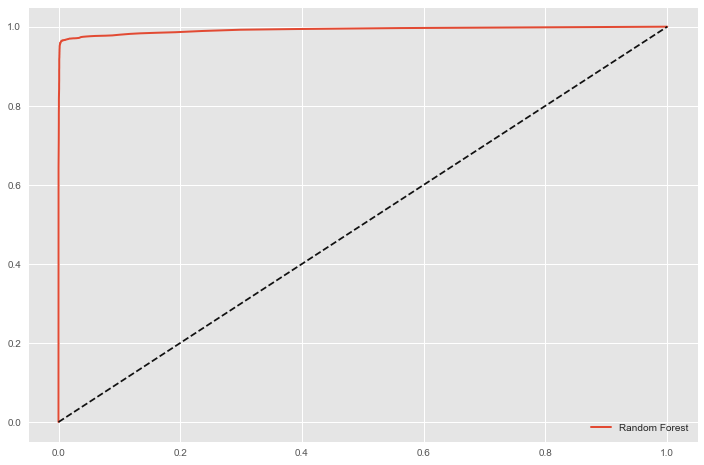

In [341]:
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.legend(loc='lower right')
plt.show

In [342]:
roc_auc_score(y_train, y_scores_forest)

0.992222314025349

In [343]:
y_scores_forest

array([0.13, 0.19, 0.04, ..., 0.  , 0.  , 0.02])

In [344]:
y_train_pred_forest=cross_val_predict(forest_clf, X_train,y_train, cv=3)

In [345]:
precision_score(y_train, y_train_pred_forest)

0.9884684684684685

In [346]:
recall_score(y_train,y_train_pred_forest)

0.960098004900245

We have some vry good evaluation score on the train set let's try on the test set

In [347]:
parameters = {
    'n_estimators'      : [320,330,340],
    'max_depth'         : [8, 9, 10, 11, 12],
    'random_state'      : [0],
    #'max_features': ['auto'],
    #'criterion' :['gini']
}

In [348]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Evaluation on the test set 

In [349]:
y_test_pred_forest=cross_val_predict(forest_clf, X_test,y_test, cv=3)

In [350]:
precision_score(y_test, y_test_pred_forest)

0.9833836858006042

In [351]:
recall_score(y_test,y_test_pred_forest)

0.9117647058823529

In [352]:
clf = RandomizedSearchCV(RandomForestClassifier(), parameters, cv=10, n_jobs=-1)
clf.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [8, 9, 10, 11, 12],
                                        'n_estimators': [320, 330, 340],
                                        'random_state': [0]})

In [353]:
model=clf.best_estimator_

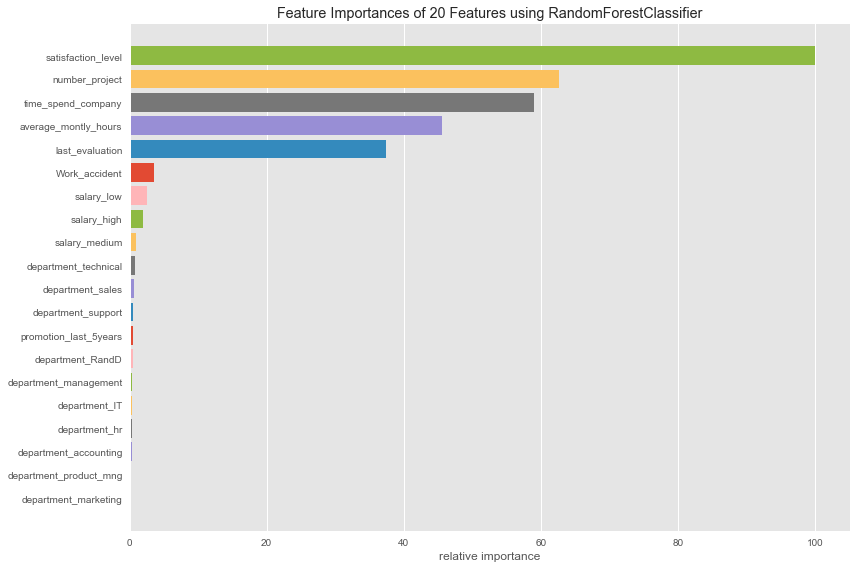

In [354]:
dt=model
viz= FeatureImportances(dt)
viz.fit(X_train, y_train)
viz.show();

In [355]:
y_test_pred_forest_best=cross_val_predict(model, X_test,y_test, cv=3)

In [356]:
precision_score(y_test, y_test_pred_forest_best)

0.9819277108433735

In [357]:
recall_score(y_test, y_test_pred_forest_best)

0.9131652661064426

In [358]:
X_train.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'department_IT', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [359]:
X_train2=X_train[['satisfaction_level', 'number_project','time_spend_company','average_montly_hours','last_evaluation']]

In [360]:
X_test2=X_test[['satisfaction_level', 'number_project','time_spend_company','average_montly_hours','last_evaluation']]

In [361]:
y_test2_pred_forest_best=cross_val_predict(model, X_test2,y_test, cv=3)

In [362]:
precision_score(y_test, y_test2_pred_forest_best)

0.9850746268656716

In [363]:
recall_score(y_test, y_test2_pred_forest_best)

0.9243697478991597